In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s5e5/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e5/test.csv")

In [4]:
train.describe()

id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000

In [5]:
train.describe(include='object')

Sex
count   750000
unique       2
top     female
freq    375721

In [6]:
test.describe()

id            Age         Height         Weight  \
count  250000.000000  250000.000000  250000.000000  250000.000000   
mean   874999.500000      41.452464     174.725624      75.147712   
std     72168.927986      15.177769      12.822039      13.979513   
min    750000.000000      20.000000     127.000000      39.000000   
25%    812499.750000      28.000000     164.000000      63.000000   
50%    874999.500000      40.000000     174.000000      74.000000   
75%    937499.250000      52.000000     185.000000      87.000000   
max    999999.000000      79.000000     219.000000     126.000000   

            Duration     Heart_Rate      Body_Temp  
count  250000.000000  250000.000000  250000.000000  
mean       15.415428      95.479084      40.036093  
std         8.349133       9.450161       0.778448  
min         1.000000      67.000000      37.100000  
25%         8.000000      88.000000      39.600000  
50%        15.000000      95.000000      40.300000  
75%        23.000000     103.000000      40.600000  
max        30.000000     128.000000      41.500000

In [7]:
test.describe(include='object')

Sex
count   250000
unique       2
top     female
freq    125281

In [8]:
from ydata_profiling import ProfileReport
reports = ProfileReport(train)
display(reports)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:02<00:00,  3.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observation:
1. Data has similar distribution of males and females.
2. Highest frequency for age is 20 and lowest frequency is for above 70.
3. height has almost normal distribution from range 140 to 220.
4. Weight ranges from 36 to 132.
5. Maximum duration is 30.
6. Heart rates range in between 67 to 128.
7. Max body temp is 41.5.
8. Calories burnt increases with increase in Duration, Hear_Rate, Body_Temp.
9. Duratation and heart rate has linear relation.
10. For Age more than 50 Calories burned are mostly below 200.

In [11]:
train.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
plt.figure(figsize=(16,6))

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

In [13]:
# Exploring sex vs calories
sns.catplot(x = train['Sex'], y = train['Calories'])

In [24]:
sns.lineplot(x = train['Duration'], y=train['Heart_Rate'])

<Axes: xlabel='Duration', ylabel='Heart_Rate'>

<Axes: xlabel='Duration', ylabel='Body_Temp'>

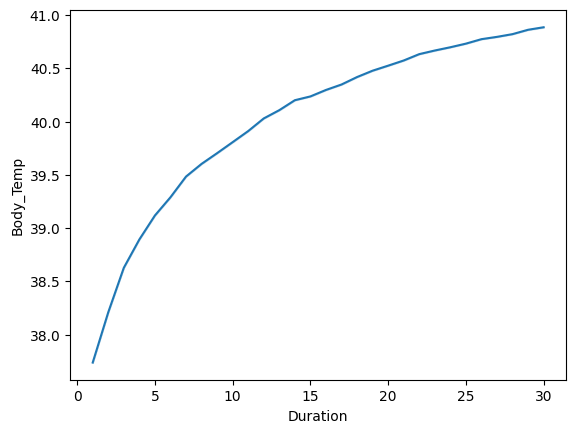

In [25]:
sns.lineplot(x = train['Duration'], y=train['Body_Temp'])

<Axes: xlabel='Heart_Rate', ylabel='Body_Temp'>

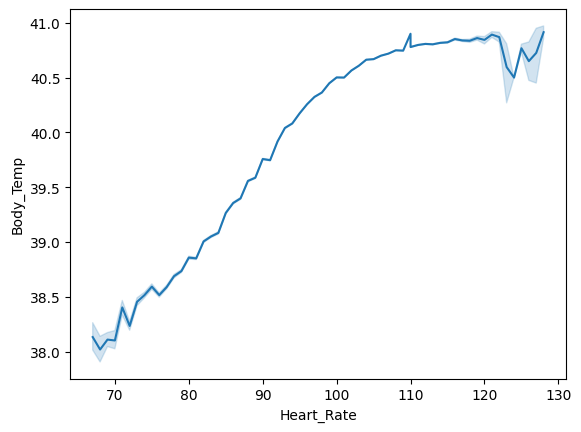

In [30]:
sns.lineplot(x = train['Heart_Rate'], y=train['Body_Temp'])

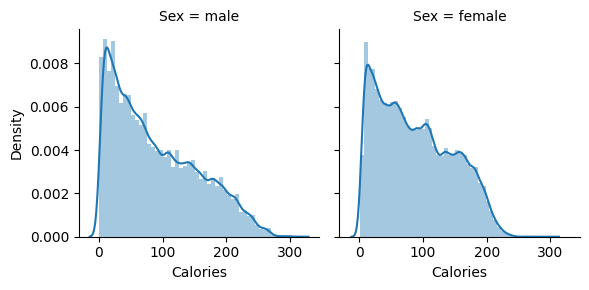

In [34]:
# Explore Sex vs Calories
g = sns.FacetGrid(train, col='Sex')
g = g.map(sns.distplot, "Calories")

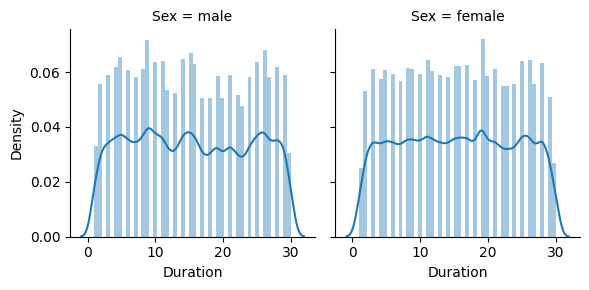

In [36]:
g = sns.FacetGrid(train, col='Sex')
g = g.map(sns.distplot, "Duration")